In [122]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.io as sio
plt.rcParams["figure.figsize"] = (7,7)

In [123]:
#function to estimate the mean and standrad deviation for the calculation og gaussian
def estimateGaussian(X):
    m, n = X.shape
    mean_val = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    
    mean_val = np.mean(X.T, axis=1)
    mean_val = mean_val.reshape(mean_val.shape[0], -1)
    sigma2 = np.var(X.T, axis=1)
    sigma2 = sigma2.reshape(sigma2.shape[0], -1)

    return mean_val, sigma2

In [124]:
#function for finding the multivariate gaussian proability
import scipy.linalg as linalg

def multivariateGaussian(Xval,mean_val,sigma2):
    k = len(mean_val)
    if (sigma2.shape[0]==1) or (sigma2.shape[1]==1):
        sigma2 = linalg.diagsvd(sigma2.flatten(),len(sigma2.flatten()),len(sigma2.flatten()))

        Xval= Xval - mean_val.T
        prob_val = np.dot(np.power(2 * np.pi, - k / 2.0),np.power(np.linalg.det(sigma2),-0.5)) * np.exp(-0.5 * np.sum(np.dot(Xval, np.linalg.pinv(sigma2))* Xval, axis=1))
    return prob_val

In [125]:
def visualizeFit(X,mean_val,sigma2):
    X1, X2 = np.meshgrid(np.arange(0,30,0.5), np.arange(0,30,0.5))
    Z = multivariateGaussian(np.column_stack((X1.reshape(X1.size),X2.reshape(X2.size))),mean_val,sigma2)
    Z = Z.reshape(X1.shape)
    print("Visualization Established");

    plt.scatter(X[:,0],X[:,1],marker='x')

    if (np.sum(np.isinf(Z)) == 0):
        plt.contour(X1, X2, Z, np.power(10,(np.arange(-20, 0.1, 3)).T))


In [126]:
def selectThreshold(Yval,Pval):

    #initialize values
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0

    step = (max(Pval) - min(Pval)) / 1000
    for epsilon in np.arange(min(Pval), max(Pval),  step):
        pred = Pval < epsilon
        tp = sum(((Yval == 1) & (pred == 1)))
        fp = sum((Yval == 0) & (pred == 1))
        fn = sum((Yval == 1) & (pred == 0))
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        F1 = 2 * prec * rec / (prec + rec)
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
        
    return bestEpsilon, bestF1

In [127]:
mat = sio.loadmat("ex8data1.mat")
X = mat.get("X")
Xval = mat.get("Xval")
Yval = mat.get("yval").flatten()

Text(0.5, 1.0, 'Figure 1. The First Dataset (ex8data1)')

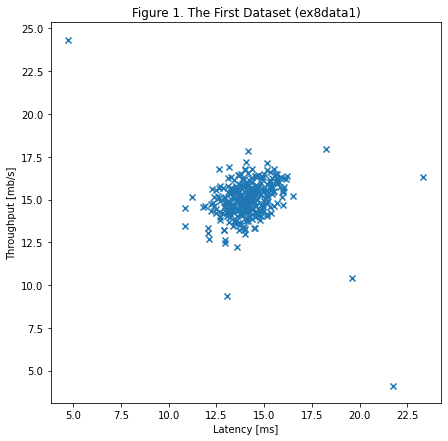

In [128]:
plt.scatter(X[:,0], X[:,1],marker='x')
plt.xlabel("Latency [ms]")
plt.ylabel("Throughput [mb/s]")
plt.title("Figure 1. The First Dataset (ex8data1)")

Visualization Established


Text(0.5, 1.0, 'Figure 2. The Gaussian Distribution contours of the distribution to fit the data values')

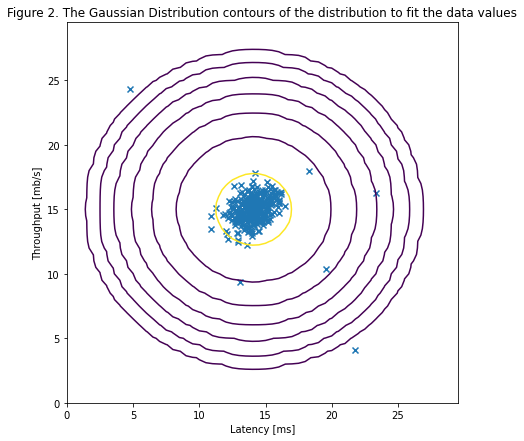

In [129]:
mean_val , sigma2 = estimateGaussian(X)

Pval = multivariateGaussian(X,mean_val,sigma2)

visualizeFit(X,mean_val,sigma2)
plt.xlabel("Latency [ms]")
plt.ylabel("Throughput [mb/s]")
plt.title("Figure 2. The Gaussian Distribution contours of the distribution to fit the data values")

Best epsilon found using cross-validation: 8.990852779269495e-05
Best F1 on Cross Validation Set:  0.8750000000000001
(A value epsilon of about 8.99e-05 is expected.)
Visualization Established


Text(0.5, 1.0, 'Figure 3: The Anomalies figured out')

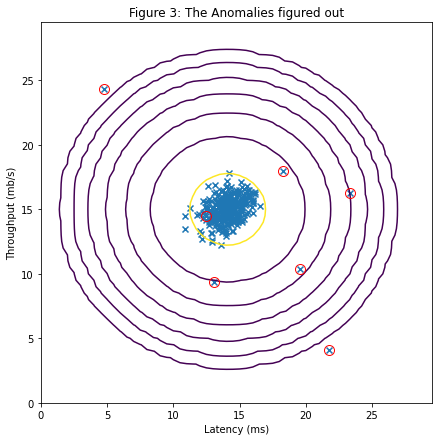

In [130]:
Pval = multivariateGaussian(Xval, mean_val, sigma2)
epsilon, F1 = selectThreshold(Yval, Pval)

print('Best epsilon found using cross-validation: {}'.format(epsilon))
print('Best F1 on Cross Validation Set:  {}'.format(F1))
print('(A value epsilon of about 8.99e-05 is expected.)')

outliers = Pval < epsilon
plt.plot(X[outliers, 0], X[outliers, 1], 'ro', markersize=10, fillstyle='none')
visualizeFit(X, mean_val, sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Figure 3: The Anomalies figured out')


In [131]:
mat2 = sio.loadmat('ex8data2.mat')
X = mat2.get("X")
Xval = mat2.get("Xval")
Yval = mat2.get("yval").flatten()

# Apply the same steps to the larger dataset.
mean_val, sigma2 = estimateGaussian(X)

# Training set. 
p = multivariateGaussian(X, mean_val, sigma2)

# Cross-validation set.
Pval = multivariateGaussian(Xval, mean_val, sigma2)

# Find the best threshold.
epsilon, F1 = selectThreshold(Yval, Pval)

print('Best epsilon found using cross-validation: {}'.format(epsilon))
print('Best F1 on Cross Validation Set: {}'.format(F1))
print('# Outliers found: {}'.format(sum(p < epsilon)))

Best epsilon found using cross-validation: 1.377228890761358e-18
Best F1 on Cross Validation Set: 0.6153846153846154
# Outliers found: 117
